In [2]:
import torch
import matplotlib.pyplot as plt
import sys
sys.path.append('../')

0.0009997664157799118
0.001
0.001
0.0005
0.0005
0.0005
0.00025
0.00025
0.000125
0.000125
6.25e-05
3.125e-05


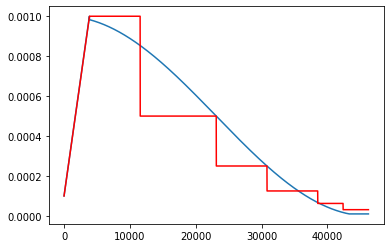

In [10]:
from visdial.optim import Adam, LRScheduler

net = torch.nn.Linear(2, 3)
optimizer = Adam(params=net.parameters())

batch_size = 32
num_samples = 123287
num_batches = int(num_samples/batch_size + 1) # 3853
num_epochs = 12
init_lr = 1e-3
milestones = [3, 6, 8, 10, 11]

cosine_scheduler = LRScheduler(optimizer,
                           batch_size=batch_size,
                           num_samples=num_samples,
                           num_epochs=num_epochs,
                           min_lr=1e-5,
                           init_lr=init_lr,
                           warmup_factor=0.1,
                           warmup_epochs=1,
                           scheduler_type='CosineLR',
                           )

cosine_step_scheduler = LRScheduler(optimizer,
                           batch_size=batch_size,
                           num_samples=num_samples,
                           num_epochs=num_epochs,
                           min_lr=1e-5,
                           init_lr=init_lr,
                           warmup_factor=0.1,
                           warmup_epochs=1,
                           scheduler_type='CosineStepLR',
                           )

linear_scheduler = LRScheduler(optimizer,
                           batch_size=batch_size,
                           num_samples=num_samples,
                           num_epochs=num_epochs,
                           min_lr=1e-5,
                           init_lr=init_lr,
                           warmup_factor=0.1,
                           warmup_epochs=1,
                           scheduler_type='LinearLR',
                           milestone_steps=milestones,
                           linear_gama=0.5
                           )

global_iterations = 0
cosine_lr = []
cosine_step_lr = []
linear_lr = []

for epoch in range(num_epochs):
    for batch in range(num_batches):
        cosine_lr.append(cosine_scheduler.step(global_iterations))
        linear_lr.append(linear_scheduler.step(global_iterations))
        cosine_step_lr.append(cosine_step_scheduler.step(global_iterations))
        global_iterations += 1
    print(linear_lr[-1])
        
plt.plot(range(len(cosine_lr)), cosine_lr)
plt.plot(range(len(cosine_lr)), linear_lr, 'r')
# plt.plot(range(len(cosine_step_lr)), cosine_step_lr, 'green')
plt.show()

In [1]:
!pwd

/home/quang/workspace/repos/visdial/test


In [ ]:
linear_lr[-1]

In [ ]:
    def cosine_multi_step(self, cur_iter):
milestones = [1, 9, 17, 25]
        cur_epoch = int(cur_iter / self.total_iters_per_epoch)
        for i, milestone in enumerate(milestones):
            if cur_epoch < milestone:
                continue
            else:
                return i
                

In [ ]:
milestones = [1, 9, 17, 25]

def find_range(cur_epoch):
    for i, milestone in enumerate(milestones):
        if cur_epoch >= milestone:
            continue
        else:
            return i-1, milestones[i - 1], milestones[i]

In [ ]:
32

In [ ]:
int(33 / 32)

In [ ]:
for epoch in range(1, 33):
    print(epoch, find_range(epoch))